# Demo of CNMF

This notebook demonstrates how to use CMFpy, a package that implements Convolutive Matrix (CMF) in Python. The goal of CMF is to minimize the objective

$$ J = \| \hat{X} - X \| $$

where $X$ is a data matrix and $\hat{X}$ is an estimate given by

$$ \hat{X} = W * \mathcal{H} = \sum_{l=1}^{L} W_{::l} H_l $$

where $W$ is an $N \times K \times L$ tensor and $H_l$ is the matrix $\mathcal{H}$ with columns shifted right $l$ times and padded with zeros on the left.

In [1]:
import matplotlib.pyplot as plt

from numpy.linalg import norm
import numpy as np

from cmfpy import CMF  # CMF model
# from cmfpy.utils import sort_neurons, plot_H_components  # Helper functions for visual
from cmfpy.datasets import Synthetic  # Synthetic dataset

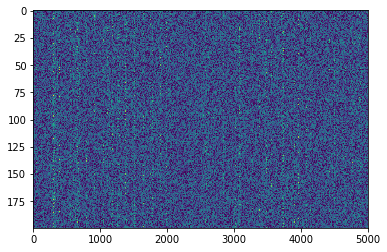

In [7]:
# Generate data
synth_dataset = Synthetic(
    n_components=3,
    n_units=200,
    n_lags=20,
    n_timebins=5000,
    H_sparsity=.99,
    noise_scale=.5,
    seed=1,
)

data = synth_dataset.generate()
plt.imshow(data, aspect='auto')
plt.show()

In [12]:
# Fit model
model = CMF(
    rand_state=123,
    n_components=3,
    maxlag=30,
    method='mult',
    max_iter=50,
    tol=0.0,
    verbose=True,
    acc_steps=3,
)

%time model.fit(data);

CPU times: user 52.4 s, sys: 1.82 s, total: 54.3 s
Wall time: 13.6 s


In [9]:
# Fit model
alt_model = CMF(
    rand_state=123,
    n_components=3,
    maxlag=30,
    method='_alt_mult',
    max_iter=60,
    tol=0.0,
    verbose=True,
    acc_steps=1,
)
%time alt_model.fit(data);

CPU times: user 2min 8s, sys: 7.67 s, total: 2min 16s
Wall time: 34.1 s


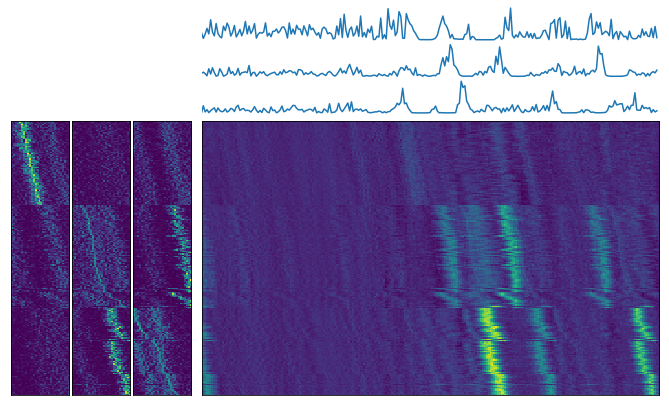

In [13]:
# plot model prediction
model.plot(tmin=150, tmax=400);

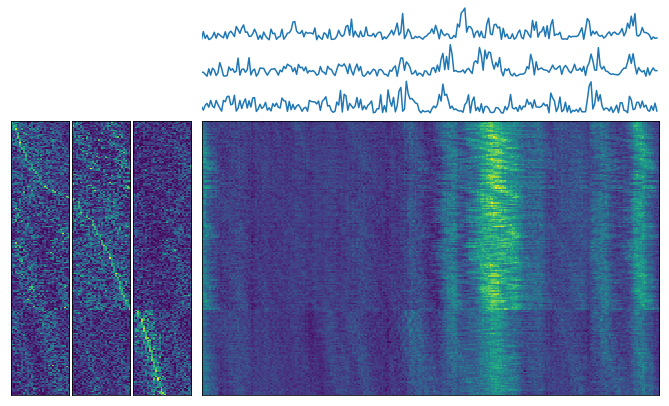

In [11]:
alt_model.plot(tmin=150, tmax=400);

In [ ]:
# Plot raw data after lexographic sorting
model.plot(data, tmin=150, tmax=400, sort=True);

In [16]:
alt_H_hist.max()

0.32100366273758624

In [17]:
alt_H_hist.min()

0.0